## Lead Scoring Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

### Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing dataset
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
leads_data.shape

(9240, 37)

In [5]:
leads_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Data Cleaning

In [6]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
leads_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [9]:
6528*100/len(leads_data["What matters most to you in choosing a course"])

70.64935064935065

In [10]:
leads_data["What matters most to you in choosing a course"].isnull().sum()*100/len(leads_data["What matters most to you in choosing a course"])

29.318181818181817

#### What matters most to you in choosing a course is dropped as 29% of values are  null

In [11]:
leads_data=leads_data.drop(["What matters most to you in choosing a course"],axis=1)

In [12]:
leads_data.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                     2461
Specialization                              1438
How did you hear about X Education          2207
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [13]:
leads_data["Asymmetrique Activity Index"].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [14]:
leads_data["Asymmetrique Activity Index"].isnull().sum()*100/len(leads_data["Asymmetrique Activity Index"])

45.64935064935065

In [15]:
3839*100/len(leads_data["Asymmetrique Activity Index"])

41.54761904761905

#### Asymmetrique Activity Index is dropped as 45% of values are missing

In [16]:
leads_data=leads_data.drop(["Asymmetrique Activity Index"],axis=1)

In [17]:
leads_data.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                     2461
Specialization                              1438
How did you hear about X Education          2207
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [18]:
leads_data["Asymmetrique Profile Index"].isnull().sum()*100/len(leads_data["Asymmetrique Profile Index"])

45.64935064935065

In [19]:
leads_data["Asymmetrique Profile Index"].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [20]:
2203*100/len(leads_data["Asymmetrique Profile Index"])

23.841991341991342

In [21]:
leads_data["Asymmetrique Activity Score"].isnull().sum()*100/len(leads_data["Asymmetrique Activity Score"])

45.64935064935065

In [22]:
leads_data["Asymmetrique Profile Score"].isnull().sum()*100/len(leads_data["Asymmetrique Profile Score"])

45.64935064935065

#### Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score are dropped as  45% of values are missing

In [23]:
leads_data=leads_data.drop(["Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],axis=1)

In [24]:
leads_data.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                     2461
Specialization                              1438
How did you hear about X Education          2207
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [25]:
leads_data["Tags"].isnull().sum()*100/len(leads_data["Tags"])

36.28787878787879

In [26]:
leads_data["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [27]:
2072*100/len(leads_data["Tags"])

22.424242424242426

#### Tags column is dropped as it has 36% of null values

In [28]:
leads_data=leads_data.drop(["Tags"],axis=1)

In [29]:
leads_data.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                     2461
Specialization                              1438
How did you hear about X Education          2207
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [30]:
leads_data["City"].isnull().sum()*100/len(leads_data["City"])

15.367965367965368

In [31]:
leads_data["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
3222*100/9240

34.87012987012987

In [33]:
leads_data[leads_data.City=="Select"]

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
12    8bf76a52-2478-476b-8618-1688e07874ad       660562   
14    a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15    25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
...                                    ...          ...   
9204  8b7c2e60-ac6a-4ffc-8d85-93825e548ddb       579883   
9206  c1ec7b92-dc83-44a9-90c2-fdd0a9b2690d       579869   
9217  b8872c12-7534-498d-8f4a-e79a19516db1       579786   
9226  c3bb1471-53d5-4244-b2e5-4bbb543835c1       579735   
9233  3f715465-2546-47cd-afa8-8b8dc63b8b43       579622   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
12                        API  Organic Search           No          No   
14    Landing Page Submission  Direct Traffic          Yes          No   
15                        API  Organic Search           No          No   
...                       ...             ...          ...         ...   
9204                      API          Google           No          No   
9206                      API  Organic Search           No          No   
9217                      API      Olark Chat           No          No   
9226                      API      Olark Chat           No          No   
9233                      API  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
12            1         11.0                         1538   
14            0          1.0                          481   
15            1          6.0                         1012   
...         ...          ...                          ...   
9204          0          2.0                           12   
9206          0          2.0                         1370   
9217          0          0.0                            0   
9226          0          0.0                            0   
9233          1         13.0                         1409   

      Page Views Per Visit  ... Through Recommendations  \
0                      0.0  ...                      No   
1                      2.5  ...                      No   
12                    11.0  ...                      No   
14                     1.0  ...                      No   
15                     6.0  ...                      No   
...                    ...  ...                     ...   
9204                   2.0  ...                      No   
9206                   2.0  ...                      No   
9217                   0.0  ...                      No   
9226                   0.0  ...                      No   
9233                   2.6  ...                      No   

     Receive More Updates About Our Courses      Lead Quality  \
0                                        No  Low in Relevance   
1                                        No               NaN   
12                                       No          Might be   
14                                       No               NaN   
15                                       No          Might be   
...                                     ...               ...   
9204                                     No               NaN   
9206                                     No               NaN   
9217                                     No          Not Sure   
9226                                     No          Not Sure   
9233                                     No               NaN   

     Update me on Supply Chain Content Get updates on DM Content  \
0                                   No                        No   
1                                   No                        No   
12    

In [34]:
leads_data[leads_data.City=="Select"]

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
12    8bf76a52-2478-476b-8618-1688e07874ad       660562   
14    a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15    25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
...                                    ...          ...   
9204  8b7c2e60-ac6a-4ffc-8d85-93825e548ddb       579883   
9206  c1ec7b92-dc83-44a9-90c2-fdd0a9b2690d       579869   
9217  b8872c12-7534-498d-8f4a-e79a19516db1       579786   
9226  c3bb1471-53d5-4244-b2e5-4bbb543835c1       579735   
9233  3f715465-2546-47cd-afa8-8b8dc63b8b43       579622   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
12                        API  Organic Search           No          No   
14    Landing Page Submission  Direct Traffic          Yes          No   
15                        API  Organic Search           No          No   
...                       ...             ...          ...         ...   
9204                      API          Google           No          No   
9206                      API  Organic Search           No          No   
9217                      API      Olark Chat           No          No   
9226                      API      Olark Chat           No          No   
9233                      API  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
12            1         11.0                         1538   
14            0          1.0                          481   
15            1          6.0                         1012   
...         ...          ...                          ...   
9204          0          2.0                           12   
9206          0          2.0                         1370   
9217          0          0.0                            0   
9226          0          0.0                            0   
9233          1         13.0                         1409   

      Page Views Per Visit  ... Through Recommendations  \
0                      0.0  ...                      No   
1                      2.5  ...                      No   
12                    11.0  ...                      No   
14                     1.0  ...                      No   
15                     6.0  ...                      No   
...                    ...  ...                     ...   
9204                   2.0  ...                      No   
9206                   2.0  ...                      No   
9217                   0.0  ...                      No   
9226                   0.0  ...                      No   
9233                   2.6  ...                      No   

     Receive More Updates About Our Courses      Lead Quality  \
0                                        No  Low in Relevance   
1                                        No               NaN   
12                                       No          Might be   
14                                       No               NaN   
15                                       No          Might be   
...                                     ...               ...   
9204                                     No               NaN   
9206                                     No               NaN   
9217                                     No          Not Sure   
9226                                     No          Not Sure   
9233                                     No               NaN   

     Update me on Supply Chain Content Get updates on DM Content  \
0                                   No                        No   
1                                   No                        No   
12    

#### City is having "Select" as value which is same as null, replacing with null

In [35]:
leads_data.loc[leads_data.City=="Select","City"]=np.nan

In [36]:
leads_data["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [37]:
2249*100/9240

24.33982683982684

In [38]:
h=leads_data.City.mode()

#### Missing values in City are imputed with mode

In [39]:
leads_data.loc[leads_data['City'].isnull(),"City"]=h[0]

In [40]:
leads_data.City.isnull().sum()

0

In [41]:
leads_data.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                     2461
Specialization                              1438
How did you hear about X Education          2207
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [42]:
leads_data["Lead Profile"].isnull().sum()*100/len(leads_data["Lead Profile"])

29.318181818181817

In [43]:
leads_data["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [44]:
leads_data["Lead Profile"]

0               Select
1               Select
2       Potential Lead
3               Select
4               Select
             ...      
9235    Potential Lead
9236    Potential Lead
9237    Potential Lead
9238               NaN
9239    Potential Lead
Name: Lead Profile, Length: 9240, dtype: object

#### Lead Profile also have "Select" as vaue which is replaced with null

In [45]:
leads_data.loc[leads_data["Lead Profile"]=='Select','Lead Profile']=np.nan

In [46]:
leads_data["Lead Profile"].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [47]:
leads_data["Lead Profile"].isnull().sum()*100/len(leads_data["Lead Profile"])

74.18831168831169

#### Lead Profile is having 75% of misssing values , so dropping the column

In [48]:
leads_data=leads_data.drop(["Lead Profile"],axis=1)

In [49]:
leads_data.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                     2461
Specialization                              1438
How did you hear about X Education          2207
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [50]:
leads_data["Lead Quality"].isnull().sum()*100/len(leads_data["Lead Quality"])

51.59090909090909

#### Lead Quality is having more than 50% of missing values, hence dropping the column

In [51]:
leads_data=leads_data.drop(["Lead Quality"],axis=1)

In [52]:
leads_data.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                     2461
Specialization                              1438
How did you hear about X Education          2207
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [53]:
leads_data["What is your current occupation"].isnull().sum()*100/len(leads_data["What is your current occupation"])

29.11255411255411

In [54]:
leads_data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [55]:
g=leads_data["What is your current occupation"].mode()

#### Missing values in "What is your current occupation" are imputed with mode  value

In [56]:
leads_data.loc[leads_data['What is your current occupation'].isnull(),"What is your current occupation"]=g[0]

In [57]:
leads_data.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                     2461
Specialization                              1438
How did you hear about X Education          2207
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [58]:
leads_data["Country"].isnull().sum()*100/len(leads_data["Country"])

26.634199134199132

In [59]:
leads_data["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [60]:
i=leads_data["Country"].mode()

#### Mising values in country are imputed with mode value

In [61]:
leads_data.loc[leads_data['Country'].isnull(),"Country"]=i[0]

In [62]:
leads_data.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                        0
Specialization                              1438
How did you hear about X Education          2207
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [63]:
leads_data["How did you hear about X Education"].isnull().sum()*100/len(leads_data["How did you hear about X Education"])

23.885281385281385

In [64]:
leads_data["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### Select values in "How did you hear about X Education" are replaced with null values

In [65]:
leads_data.loc[leads_data["How did you hear about X Education"]=='Select','How did you hear about X Education']=np.nan

In [66]:
leads_data["How did you hear about X Education"].isnull().sum()*100/len(leads_data["How did you hear about X Education"])

78.46320346320347

#### 78% of values are missing in "How did you hear about X Education", so the column is dropped

In [67]:
leads_data=leads_data.drop(["How did you hear about X Education"],axis=1)

In [68]:
leads_data.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                        0
Specialization                              1438
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendati

In [69]:
leads_data["Specialization"].isnull().sum()*100/len(leads_data["Specialization"])

15.562770562770563

In [70]:
leads_data["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Select values  in Specialization are replaced with null values

In [71]:
leads_data.loc[leads_data["Specialization"]=='Select','Specialization']=np.nan

In [72]:
leads_data["Specialization"].isnull().sum()*100/len(leads_data["Specialization"])

36.58008658008658

In [73]:
leads_data["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### Null values in Specialization are categorized as 'Others'

In [74]:
leads_data.loc[leads_data["Specialization"].isnull(),'Specialization']='Others'

In [75]:
leads_data["Specialization"].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [76]:
leads_data.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Country                                       0
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                 

In [77]:
leads_data["Lead Source"].isnull().sum()*100/len(leads_data["Lead Source"])

0.38961038961038963

In [78]:
leads_data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### google in"Lead Source" is replaced with "Google"

In [79]:
leads_data.loc[leads_data["Lead Source"]=="google","Lead Source"]='Google'

In [80]:
leads_data["Lead Source"].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### rows having null values in Lead Source column are deleted

In [81]:
leads_data=leads_data[~(leads_data["Lead Source"].isnull())]

In [82]:
leads_data["Lead Source"].isnull().sum()

0

In [83]:
leads_data.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 130
Total Time Spent on Website                   0
Page Views Per Visit                        130
Last Activity                               101
Country                                       0
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                 

In [84]:
leads_data["TotalVisits"].isnull().sum()*100/len(leads_data["TotalVisits"])

1.4124293785310735

In [85]:
leads_data["TotalVisits"].value_counts()

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

#### Rows having null values in TotalVisits column are deleted

In [86]:
leads_data=leads_data[~(leads_data["TotalVisits"].isnull())]

In [87]:
leads_data.TotalVisits.isnull().sum()

0

In [88]:
leads_data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

In [89]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [90]:
leads_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9074.000000  9074.000000  9074.000000                  9074.000000   
mean   617032.619352     0.378554     3.456028                   482.887481   
std     23348.029512     0.485053     4.858802                   545.256560   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596406.000000     0.000000     1.000000                    11.000000   
50%    615278.500000     0.000000     3.000000                   246.000000   
75%    637176.500000     1.000000     5.000000                   922.750000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
max               55.000000

In [91]:
leads_data["TotalVisits"].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Handling Outliers for numerical variables

<Axes: >

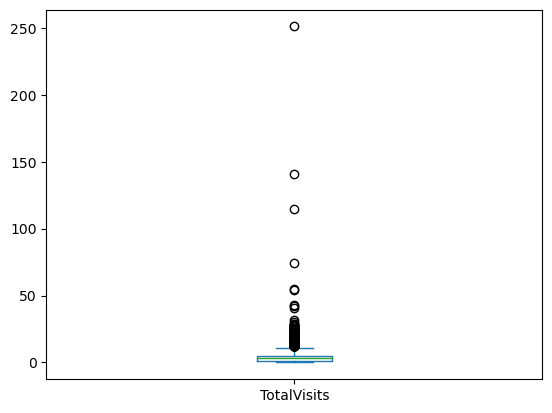

In [92]:
leads_data.TotalVisits.plot.box()

In [93]:
leads_data.TotalVisits.quantile([0.90,0.91,0.92,0.93,0.94,0.95,0.99,1])

0.90      7.0
0.91      8.0
0.92      8.0
0.93      8.0
0.94      9.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

#### rows with "TotalVisits"  column values greater than 95% quantile are removed

In [94]:
leads_data=leads_data[~(leads_data.TotalVisits>leads_data.TotalVisits.quantile(0.95))]


In [95]:
leads_data.TotalVisits.quantile([0.50,0.75,0.95,0.99,1])

0.50     3.0
0.75     4.0
0.95     8.0
0.99    10.0
1.00    10.0
Name: TotalVisits, dtype: float64

<Axes: >

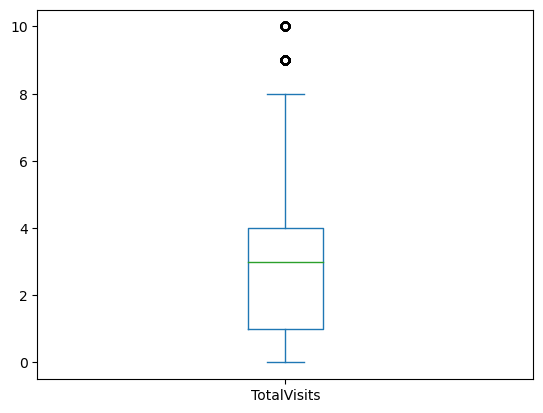

In [96]:
leads_data.TotalVisits.plot.box()

In [97]:
leads_data["Total Time Spent on Website"].describe()

count    8721.000000
mean      473.146887
std       542.265343
min         0.000000
25%         2.000000
50%       236.000000
75%       899.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

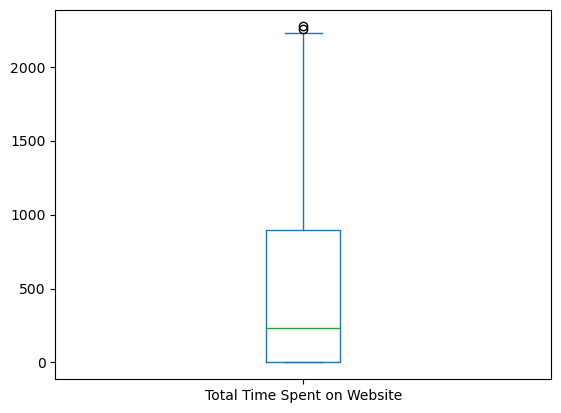

In [98]:
 leads_data["Total Time Spent on Website"].plot.box()

In [99]:
leads_data["Total Time Spent on Website"].quantile([0.50,0.75,0.94,0.95,0.99,1])

0.50     236.0
0.75     899.0
0.94    1505.0
0.95    1551.0
0.99    1826.0
1.00    2272.0
Name: Total Time Spent on Website, dtype: float64

In [100]:
leads_data["Page Views Per Visit"].describe()

count    8721.000000
mean        2.255668
std         1.922397
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

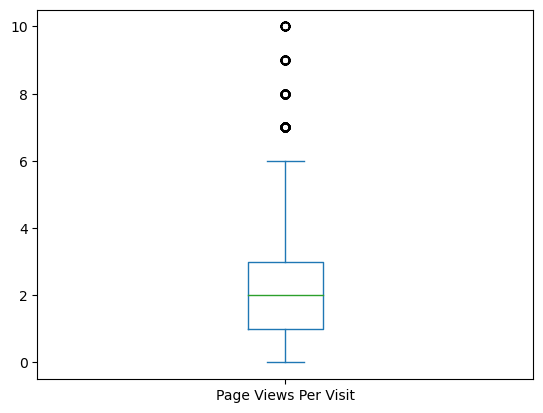

In [101]:
 leads_data["Page Views Per Visit"].plot.box()

In [102]:
leads_data["Page Views Per Visit"].quantile([0.50,0.75,0.94,0.95,0.99,1])

0.50     2.0
0.75     3.0
0.94     5.0
0.95     6.0
0.99     8.0
1.00    10.0
Name: Page Views Per Visit, dtype: float64

#### rows with "Page Views Per Visit"  column values greater than 95% quantile are removed

In [103]:
leads_data=leads_data[~(leads_data["Page Views Per Visit"]>leads_data["Page Views Per Visit"].quantile(0.95))]

<Axes: >

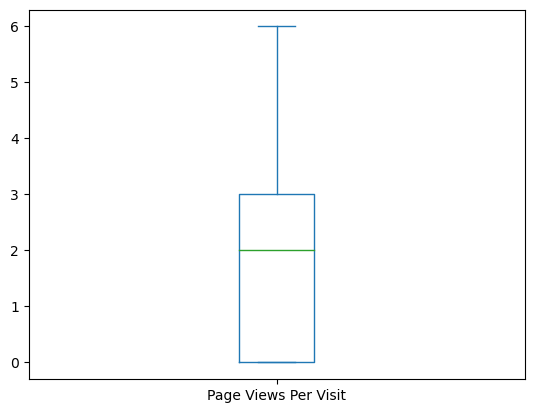

In [104]:
 leads_data["Page Views Per Visit"].plot.box()

In [105]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8445 non-null   object 
 1   Lead Number                               8445 non-null   int64  
 2   Lead Origin                               8445 non-null   object 
 3   Lead Source                               8445 non-null   object 
 4   Do Not Email                              8445 non-null   object 
 5   Do Not Call                               8445 non-null   object 
 6   Converted                                 8445 non-null   int64  
 7   TotalVisits                               8445 non-null   float64
 8   Total Time Spent on Website               8445 non-null   int64  
 9   Page Views Per Visit                      8445 non-null   float64
 10  Last Activity                       

#### Bivariate Analysis

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

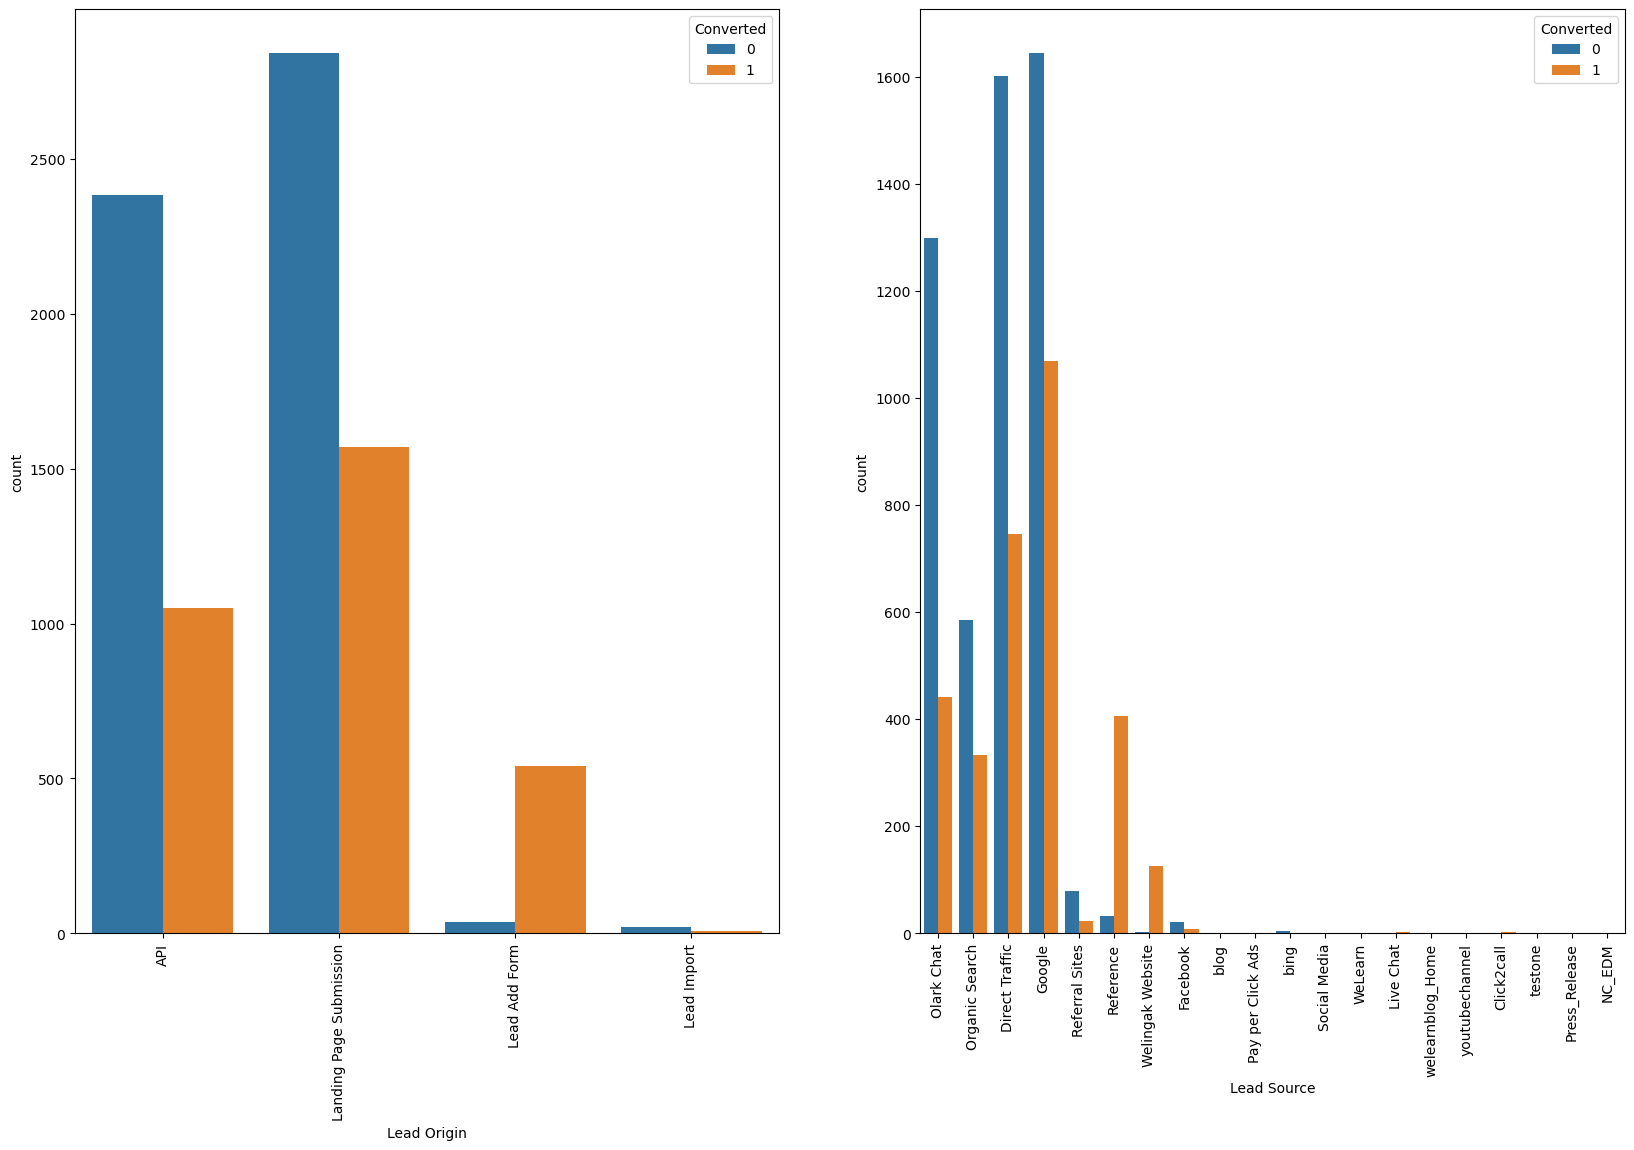

In [107]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)

plt.show()


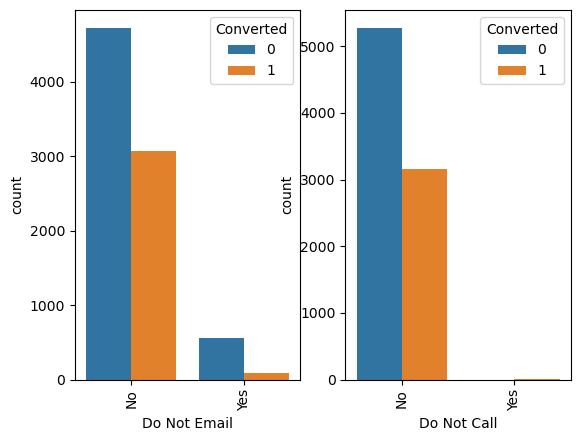

In [108]:

plt.subplot(1,2,1)
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.show()

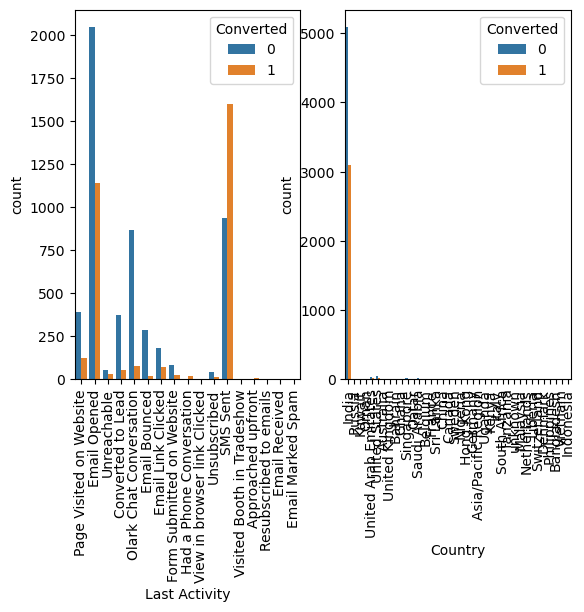

In [109]:

plt.subplot(1,2,1)
sns.countplot(x = 'Last Activity', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'Country', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.show()

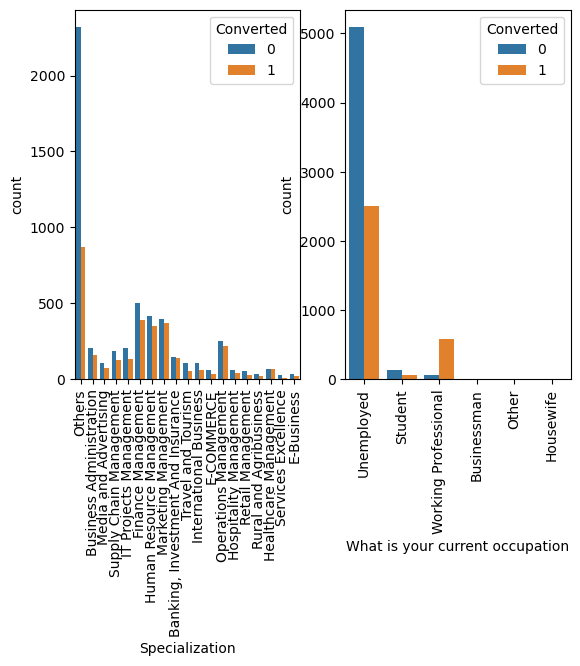

In [110]:
plt.subplot(1,2,1)
sns.countplot(x = 'Specialization', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.show()

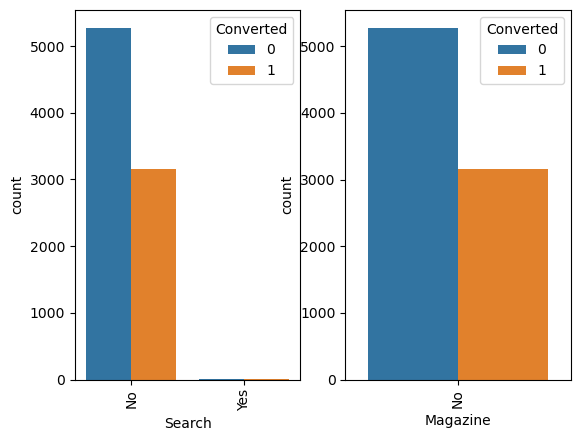

In [111]:
plt.subplot(1,2,1)
sns.countplot(x = 'Search', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'Magazine', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.show()

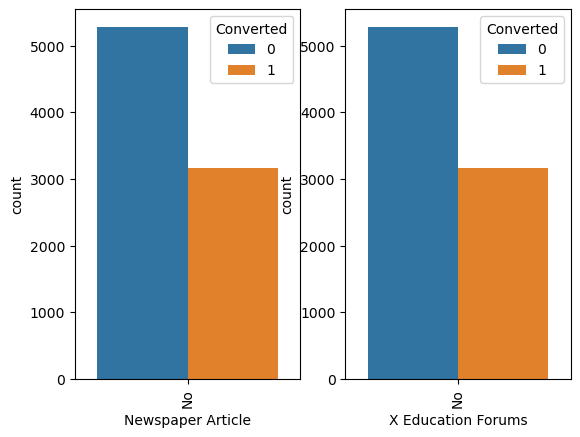

In [112]:
plt.subplot(1,2,1)
sns.countplot(x = 'Newspaper Article', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'X Education Forums', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.show()

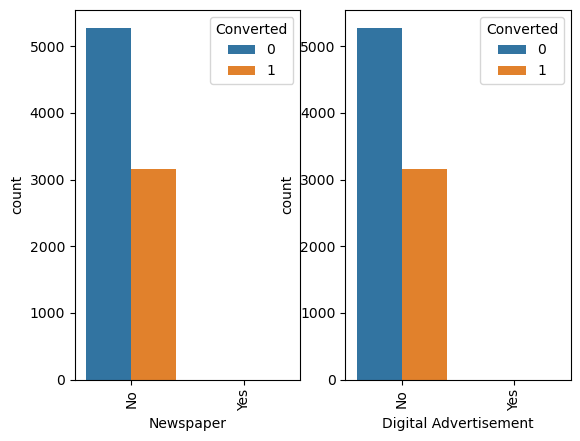

In [113]:
plt.subplot(1,2,1)
sns.countplot(x = 'Newspaper', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'Digital Advertisement', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.show()

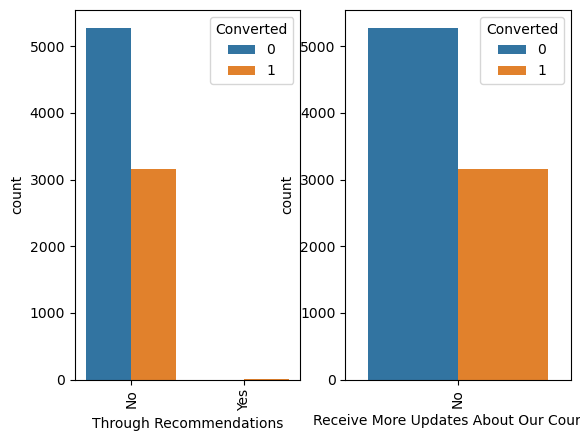

In [114]:
plt.subplot(1,2,1)
sns.countplot(x = 'Through Recommendations', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'Receive More Updates About Our Courses', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.show()

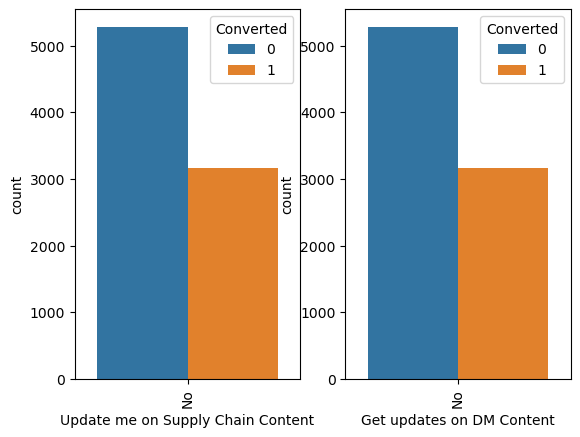

In [115]:
plt.subplot(1,2,1)
sns.countplot(x = 'Update me on Supply Chain Content', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'Get updates on DM Content', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.show()

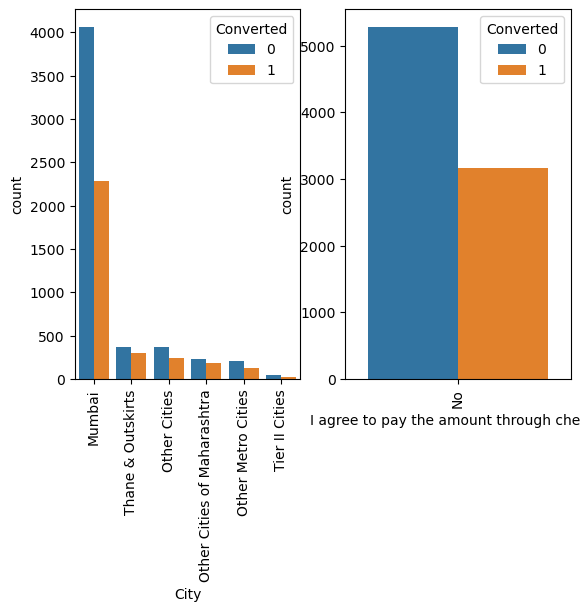

In [116]:
plt.subplot(1,2,1)
sns.countplot(x = 'City', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'I agree to pay the amount through cheque', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.show()

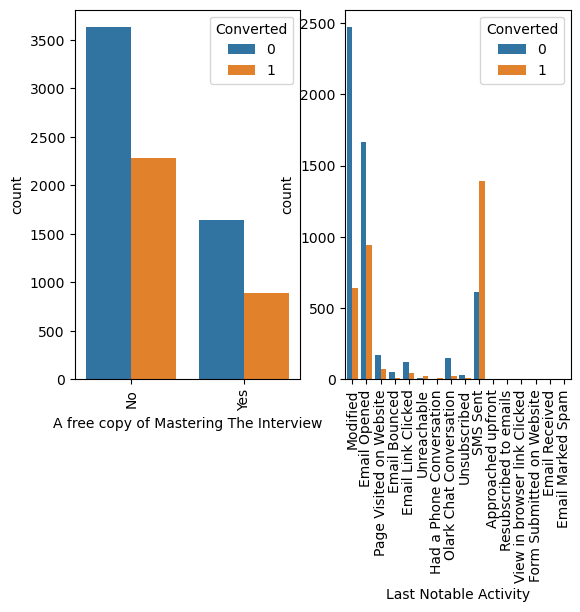

In [117]:
plt.subplot(1,2,1)
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = leads_data)
plt.xticks(rotation=90)
plt.show()

In [118]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8445 non-null   object 
 1   Lead Number                               8445 non-null   int64  
 2   Lead Origin                               8445 non-null   object 
 3   Lead Source                               8445 non-null   object 
 4   Do Not Email                              8445 non-null   object 
 5   Do Not Call                               8445 non-null   object 
 6   Converted                                 8445 non-null   int64  
 7   TotalVisits                               8445 non-null   float64
 8   Total Time Spent on Website               8445 non-null   int64  
 9   Page Views Per Visit                      8445 non-null   float64
 10  Last Activity                       

#### Below  columns aredeleted  , as their data is  baised to one valueof target variable and cannot draw any inferences from them

In [119]:
leads_data=leads_data.drop(["A free copy of Mastering The Interview","Lead Number","I agree to pay the amount through cheque","Get updates on DM Content","Update me on Supply Chain Content","Through Recommendations","Receive More Updates About Our Courses","Digital Advertisement","Newspaper","X Education Forums","Newspaper Article","Magazine","Search","Do Not Call","Country"],axis=1)

In [120]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      8445 non-null   object 
 1   Lead Origin                      8445 non-null   object 
 2   Lead Source                      8445 non-null   object 
 3   Do Not Email                     8445 non-null   object 
 4   Converted                        8445 non-null   int64  
 5   TotalVisits                      8445 non-null   float64
 6   Total Time Spent on Website      8445 non-null   int64  
 7   Page Views Per Visit             8445 non-null   float64
 8   Last Activity                    8445 non-null   object 
 9   Specialization                   8445 non-null   object 
 10  What is your current occupation  8445 non-null   object 
 11  City                             8445 non-null   object 
 12  Last Notable Activit

In [121]:
leads_data.head()


Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation    City  \
0                   Others                      Unemployed  Mumbai   
1                   Others                      Unemployed  Mumbai   
2  Business Administration                         Student  Mumbai   
3    Media and Advertising                      Unemployed  Mumbai   
4                   Others                      Unemployed  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

#### Creating Dummy Variables for Catgory Variables

In [122]:
varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads data list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [123]:
leads_data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation    City  \
0                   Others                      Unemployed  Mumbai   
1                   Others                      Unemployed  Mumbai   
2  Business Administration                         Student  Mumbai   
3    Media and Advertising                      Unemployed  Mumbai   
4                   Others                      Unemployed  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

#### As the lead source is having many categories with less count ,  mered them into category as 'Others'

In [124]:
leads_data.loc[(leads_data["Lead Source"]=='NC_EDM') | (leads_data["Lead Source"]=='bing')| (leads_data["Lead Source"]=='Click2call') | (leads_data["Lead Source"]=='Social media') 
               | (leads_data["Lead Source"]=='Live Chat') |(leads_data["Lead Source"] =='Pay per Click Ads')
               |(leads_data["Lead Source"]=='blog') |(leads_data["Lead Source"]=='WeLearn')
               |(leads_data["Lead Source"]=='welearnblog_Home')
                |(leads_data["Lead Source"]=='youtubechannel')
               |(leads_data["Lead Source"]=='testone')
                |(leads_data["Lead Source"]=='Press_Release')
               |(leads_data["Lead Source"]=='Social Media'),"Lead Source"]='Others'

In [125]:
leads_data["Lead Source"].value_counts()

Google              2714
Direct Traffic      2349
Olark Chat          1742
Organic Search       919
Reference            440
Welingak Website     128
Referral Sites       102
Facebook              30
Others                21
Name: Lead Source, dtype: int64

In [126]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      8445 non-null   object 
 1   Lead Origin                      8445 non-null   object 
 2   Lead Source                      8445 non-null   object 
 3   Do Not Email                     8445 non-null   int64  
 4   Converted                        8445 non-null   int64  
 5   TotalVisits                      8445 non-null   float64
 6   Total Time Spent on Website      8445 non-null   int64  
 7   Page Views Per Visit             8445 non-null   float64
 8   Last Activity                    8445 non-null   object 
 9   Specialization                   8445 non-null   object 
 10  What is your current occupation  8445 non-null   object 
 11  City                             8445 non-null   object 
 12  Last Notable Activit

In [127]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity','Lead Source']], drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [128]:
leads_data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization  ... Last Notable Activity_Unsubscribed  \
0                   Others  ...                                  0   
1                   Others  ...                                  0   
2  Business Administration  ...                                  0   
3    Media and Advertising  ...                                  0   
4                   Others  ...                                  0   

  Last Notable Activity_View in browser link Clicked Lead Source_Facebook  \
0                                                  0                    0   
1                                                  0                    0   
2                                                  0                    0   
3                                                  0                    0   
4                                                  0                    0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 83 columns]

In [129]:
leads_data = leads_data.drop(['Lead Origin','Last Activity','Specialization','What is your current occupation','City', 'Last Notable Activity',"Lead Source"], 1)

In [130]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 76 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           8445 non-null   object 
 1   Do Not Email                                          8445 non-null   int64  
 2   Converted                                             8445 non-null   int64  
 3   TotalVisits                                           8445 non-null   float64
 4   Total Time Spent on Website                           8445 non-null   int64  
 5   Page Views Per Visit                                  8445 non-null   float64
 6   Lead Origin_Landing Page Submission                   8445 non-null   uint8  
 7   Lead Origin_Lead Add Form                             8445 non-null   uint8  
 8   Lead Origin_Lead Import                               8445

#### Splitting the data into train and test data set

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
# Putting feature variable to X
X = leads_data.drop(['Converted','Prospect ID'], axis=1)

X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                1                            0   

   Last Activity_Email Link Clicked  ...  Last Notable Activity_Unsubscribed  \
0                                 0  ...                                   0   
1                                 0  ...                                   0   
2                                 0  ...                                   0   
3                                 0  ...                                   0   
4                                 0  ...                                   0   

   Last Notable Activity_View in browser link Clicked  Lead Source_Facebook  \
0                                                  0                      0   
1                                                  0                      0   
2                                                  0                      0   
3                                                  0                      0   
4                                                  0                      0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 74 columns]

In [133]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [134]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling the numerical variables

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
5279             1    -0.314975                    -0.504462   
3099             0    -0.314975                    -0.480383   
91               0     1.396648                     1.279233   
1577             0    -1.170787                    -0.865647   
487              0    -0.314975                    -0.617448   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
5279             -0.037025                                    1   
3099             -0.037025                                    1   
91               -0.340229                                    0   
1577             -1.249840                                    0   
487              -0.037025                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
5279                          0                        0   
3099                          0                        0   
91                            0                        0   
1577                          1                        0   
487                           0                        0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
5279                                0                            1   
3099                                0                            0   
91                                  0                            0   
1577                                0                            0   
487                                 0                            0   

      Last Activity_Email Link Clicked  ...  \
5279                                 0  ...   
3099                                 0  ...   
91                                   0  ...   
1577                                 0  ...   
487                                  0  ...   

      Last Notable Activity_Unsubscribed  \
5279                                   0   
3099                                   0   
91                                     0   
1577                                   0   
487                                    0   

      Last Notable Activity_View in browser link Clicked  \
5279                                                  0    
3099                                                  0    
91                                                    0    
1577                                                  0    
487                                                   0    

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
5279                     0                   0                       0   
3099                     0                   0                       0   
91                       0                   0                       1   
1577                     0                   0                       0   
487                      0                   1                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
5279                           0                   0                      0   
3099                           0                   0                      0   
91                             0                   0                      0   
1577                           0                   0                      1   
487                            0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  
5279                           0                             0  
3099                           0                             0  
91                             0                             0  
1577                           0                             0  
487                            0                             0  

[5 rows x 74 columns]

In [137]:
    X_train.TotalVisits.max()

3.1082720976246767

In [138]:
### Checking the Converted Rate
converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
converted

37.47779751332149

#### Finding the corrrelation between variables

In [139]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [140]:
# Let's see the correlation matrix 
plt.figure(figsize = (200,200))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

In [141]:
corrmax=X_train.corr().abs()
corrmax

Do Not Email  TotalVisits  \
Do Not Email                             1.000000     0.007153   
TotalVisits                              0.007153     1.000000   
Total Time Spent on Website              0.032036     0.394901   
Page Views Per Visit                     0.018620     0.771488   
Lead Origin_Landing Page Submission      0.101072     0.491025   
...                                           ...          ...   
Lead Source_Organic Search               0.040725     0.262840   
Lead Source_Others                       0.009302     0.001704   
Lead Source_Reference                    0.035989     0.260926   
Lead Source_Referral Sites               0.007061     0.075689   
Lead Source_Welingak Website             0.010932     0.129044   

                                     Total Time Spent on Website  \
Do Not Email                                            0.032036   
TotalVisits                                             0.394901   
Total Time Spent on Website                             1.000000   
Page Views Per Visit                                    0.402210   
Lead Origin_Landing Page Submission                     0.310303   
...                                                          ...   
Lead Source_Organic Search                              0.100208   
Lead Source_Others                                      0.007899   
Lead Source_Reference                                   0.166558   
Lead Source_Referral Sites                              0.012418   
Lead Source_Welingak Website                            0.087874   

                                     Page Views Per Visit  \
Do Not Email                                     0.018620   
TotalVisits                                      0.771488   
Total Time Spent on Website                      0.402210   
Page Views Per Visit                             1.000000   
Lead Origin_Landing Page Submission              0.577688   
...                                                   ...   
Lead Source_Organic Search                       0.267177   
Lead Source_Others                               0.004488   
Lead Source_Reference                            0.281580   
Lead Source_Referral Sites                       0.056925   
Lead Source_Welingak Website                     0.137787   

                                     Lead Origin_Landing Page Submission  \
Do Not Email                                                    0.101072   
TotalVisits                                                     0.491025   
Total Time Spent on Website                                     0.310303   
Page Views Per Visit                                            0.577688   
Lead Origin_Landing Page Submission                             1.000000   
...                                                                  ...   
Lead Source_Organic Search                                      0.027568   
Lead Source_Others                                              0.004515   
Lead Source_Reference                                           0.249429   
Lead Source_Referral Sites                                      0.069686   
Lead Source_Welingak Website                                    0.120168   

                                     Lead Origin_Lead Add Form  \
Do Not Email                                          0.028523   
TotalVisits                                           0.296486   
Total Time Spent on Website                           0.191430   
Page Views Per Visit                                  0.319043   
Lead Origin_Landing Page Submission                   0.282209   
...                                                        ...   
Lead Source_Organic Search                            0.093298   
Lead Source_Others                                    0.037348   
Lead Source_Reference                                 0.883846   
Lead Source_Referral Sites                            0.029078   
Lead Source_Welingak Website                          0

In [142]:
uppercorr = corrmax.where(np.triu(np.ones(corrmax.shape), k=1).astype(np.bool))

In [143]:
highc = [column for column in uppercorr.columns if any(uppercorr[column] > 0.80)]
highc

['What is your current occupation_Working Professional',
 'Last Notable Activity_Email Marked Spam',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Email Received',
 'Last Notable Activity_SMS Sent',
 'Last Notable Activity_Unsubscribed',
 'Last Notable Activity_View in browser link Clicked',
 'Lead Source_Facebook',
 'Lead Source_Reference']

#### Below columns are dropped, as they are highly correlated

In [144]:
X_test = X_test.drop(['Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Email Received','Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','Last Notable Activity_View in browser link Clicked','What is your current occupation_Working Professional','Lead Source_Facebook','Lead Source_Reference'], 1)
X_train = X_train.drop(['Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Email Received','Last Notable Activity_SMS Sent','Last Notable Activity_Unsubscribed','Last Notable Activity_View in browser link Clicked','What is your current occupation_Working Professional','Lead Source_Facebook','Lead Source_Reference'], 1)

In [145]:
corrmax=X_train.corr().abs()
uppercorr = corrmax.where(np.triu(np.ones(corrmax.shape), k=1).astype(np.bool))
highc = [column for column in uppercorr.columns if any(uppercorr[column] > 0.80)]
highc

[]

### Buliding the model using RFE

In [146]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [147]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [148]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True])

In [149]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Last Activity_Converted to Lead', False, 8),
 ('Last Activity_Email Bounced', False, 9),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email Marked Spam', False, 6),
 ('Last Activity_Email Opened', False, 19),
 ('Last Activity_Email Received', False, 37),
 ('Last Activity_Form Submitted on Website', False, 11),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_Resubscribed to emails', False, 49),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 44),
 ('Last Activity_Unsubscribed', False, 3),
 ('Last Activity_View in browser link Clicked', Fals

In [150]:
col = X_train.columns[rfe.support_]

In [151]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',

### Building the model with stats again to check the statistics

In [152]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2512.7
Date:                Tue, 19 Sep 2023   Deviance:                       5025.5
Time:                        19:06:16   Pearson chi2:                 5.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3769
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.0466      0.214      9.544      0.000       1.626       2.467
Do Not Email                                     -1.2587      0.166     -7.601      0.000      -1.583      -0.934
Total Time Spent on Website                       1.0472      0.041     25.657      0.000       0.967       1.127
Lead Origin_Landing Page Submission              -1.1412      0.131     -8.688      0.000      -1.399      -0.884
Lead Origin_Lead Add Form                         3.1512      0.236     13.372      0.000       2.689       3.613
Last Activity_Had a Phone Conversation            2.2137      1.002      2.209      0.027       0.250       4.178
Last Activity_Olark Chat Conversation            -1.4583      0.191     -7.644      0.000      -1.832      -1.084
Last Activity_SMS Sent                            1.3342      0.076     17.603      0.000       1.186       1.483
Specialization_Others                            -1.1640      0.126     -9.258      0.000      -1.410      -0.918
What is your current occupation_Other            -2.4020      1.036     -2.318      0.020      -4.433      -0.371
What is your current occupation_Student          -2.1724      0.296     -7.346      0.000      -2.752      -1.593
What is your current occupation_Unemployed       -2.4581      0.185    -13.316      0.000      -2.820      -2.096
Last Notable Activity_Olark Chat Conversation    -0.3157      0.429     -0.735      0.462      -1.157       0.526
Last Notable Activity_Unreachable                 1.8762      0.540      3.474      0.001       0.818       2.935
Lead Source_Olark Chat                            1.0952      0.123      8.895      0.000       0.854       1.337
Lead Source_Welingak Website                      3.1471      1.041      3.024      0.002       1.107       5.187
=================================================================================================================
"""

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                           const  23.92
3             Lead Origin_Landing Page Submission   3.47
8                           Specialization_Others   3.03
14                         Lead Source_Olark Chat   1.97
4                       Lead Origin_Lead Add Form   1.89
6           Last Activity_Olark Chat Conversation   1.55
11     What is your current occupation_Unemployed   1.46
2                     Total Time Spent on Website   1.34
10        What is your current occupation_Student   1.31
15                   Lead Source_Welingak Website   1.30
12  Last Notable Activity_Olark Chat Conversation   1.21
7                          Last Activity_SMS Sent   1.11
1                                    Do Not Email   1.02
5          Last Activity_Had a Phone Conversation   1.01
9           What is your current occupation_Other   1.01
13              Last Notable Activity_Unreachable   1.01

#### Dropping  the below column , as it P-Value is >0.05

In [155]:
X = X_train_sm.drop(["Last Notable Activity_Olark Chat Conversation"], axis = 1)

In [156]:
X_train_sm = sm.add_constant(X)

#### Building second model

In [157]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.0
Date:                Tue, 19 Sep 2023   Deviance:                       5026.1
Time:                        19:06:17   Pearson chi2:                 5.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3768
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.0488      0.214      9.556      0.000       1.629       2.469
Do Not Email                                  -1.2590      0.166     -7.606      0.000      -1.583      -0.935
Total Time Spent on Website                    1.0457      0.041     25.661      0.000       0.966       1.126
Lead Origin_Landing Page Submission           -1.1430      0.131     -8.702      0.000      -1.400      -0.886
Lead Origin_Lead Add Form                      3.1477      0.236     13.359      0.000       2.686       3.609
Last Activity_Had a Phone Conversation         2.2131      1.002      2.209      0.027       0.249       4.177
Last Activity_Olark Chat Conversation         -1.5175      0.176     -8.610      0.000      -1.863      -1.172
Last Activity_SMS Sent                         1.3339      0.076     17.604      0.000       1.185       1.482
Specialization_Others                         -1.1650      0.126     -9.262      0.000      -1.412      -0.919
What is your current occupation_Other         -2.4005      1.036     -2.316      0.021      -4.432      -0.369
What is your current occupation_Student       -2.1782      0.296     -7.369      0.000      -2.758      -1.599
What is your current occupation_Unemployed    -2.4579      0.185    -13.315      0.000      -2.820      -2.096
Last Notable Activity_Unreachable              1.8751      0.540      3.472      0.001       0.817       2.934
Lead Source_Olark Chat                         1.0931      0.123      8.880      0.000       0.852       1.334
Lead Source_Welingak Website                   3.1235      1.038      3.008      0.003       1.088       5.159
==============================================================================================================
"""

In [158]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                        const  23.92
3          Lead Origin_Landing Page Submission   3.47
8                        Specialization_Others   3.03
13                      Lead Source_Olark Chat   1.97
4                    Lead Origin_Lead Add Form   1.89
11  What is your current occupation_Unemployed   1.46
2                  Total Time Spent on Website   1.34
6        Last Activity_Olark Chat Conversation   1.34
10     What is your current occupation_Student   1.31
14                Lead Source_Welingak Website   1.30
7                       Last Activity_SMS Sent   1.11
1                                 Do Not Email   1.02
5       Last Activity_Had a Phone Conversation   1.01
9        What is your current occupation_Other   1.01
12           Last Notable Activity_Unreachable   1.01

In [159]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5279    0.010948
3099    0.327281
91      0.883056
1577    0.862167
487     0.097988
758     0.246618
7260    0.109766
7538    0.567995
2404    0.083385
8190    0.881035
dtype: float64

In [160]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01094778, 0.32728127, 0.88305617, 0.86216723, 0.09798784,
       0.2466179 , 0.10976595, 0.56799478, 0.08338519, 0.88103492])

#### Target values probabilities are calculated

In [161]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.010948         5279
1          0        0.327281         3099
2          1        0.883056           91
3          1        0.862167         1577
4          0        0.097988          487

#### Traget value is predicted assuming the cutoff to be 0.5

In [162]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0        0.010948         5279          0
1          0        0.327281         3099          0
2          1        0.883056           91          1
3          1        0.862167         1577          1
4          0        0.097988          487          0

#### All the efficiency related metrics are calculated

In [163]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3294  400]
 [ 791 1426]]


In [164]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7985112502114702


In [165]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6432115471357691

In [167]:
# Let us calculate specificity
TN / float(TN+FP)

0.8917162966973471

In [168]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10828370330265295


In [169]:
# positive predictive value 
print (TP / float(TP+FP))

0.7809419496166484


In [170]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8063647490820074


#### ROC Curve isplotted to understand the alignment of curve and its area

In [171]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [172]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

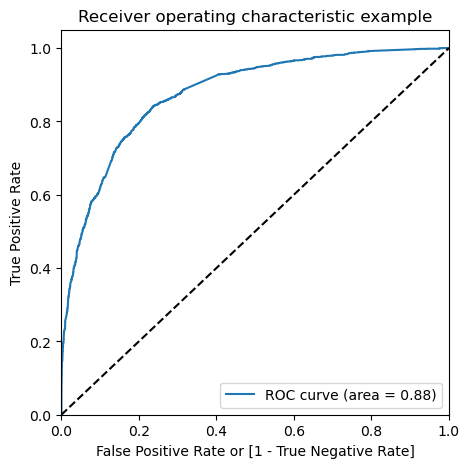

In [173]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [174]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.010948         5279          0    1    0    0    0    0   
1          0        0.327281         3099          0    1    1    1    1    0   
2          1        0.883056           91          1    1    1    1    1    1   
3          1        0.862167         1577          1    1    1    1    1    1   
4          0        0.097988          487          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    1    1    1    1    0  
3    1    1    1    1    0  
4    0    0    0    0    0

#### Plots of sensitivity, specificity, accuarcy against probabilties is drawn to  find the optimal cut-off

In [175]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375063  1.000000  0.000000
0.1   0.1  0.586195  0.970681  0.355441
0.2   0.2  0.721874  0.925575  0.599621
0.3   0.3  0.792590  0.834912  0.767190
0.4   0.4  0.805786  0.758232  0.834326
0.5   0.5  0.798511  0.643212  0.891716
0.6   0.6  0.793098  0.574650  0.924201
0.7   0.7  0.775672  0.487596  0.948565
0.8   0.8  0.750973  0.386107  0.969951
0.9   0.9  0.707495  0.235002  0.991067


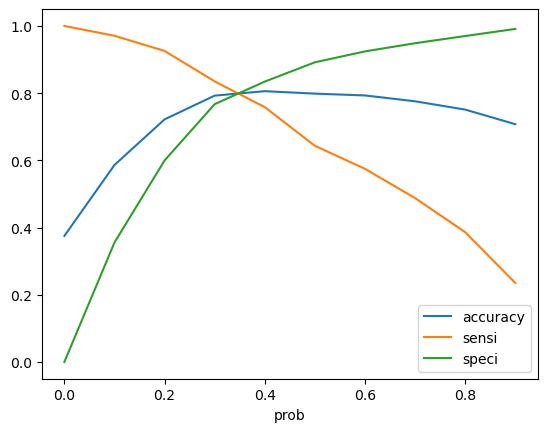

In [176]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [177]:
cutoff_df.apply(lambda x: x.accuracy == x.sensi and x.sensi == x.speci, axis=1)

0.0    False
0.1    False
0.2    False
0.3    False
0.4    False
0.5    False
0.6    False
0.7    False
0.8    False
0.9    False
dtype: bool

#### Target values are predicted again with the optimalcut off

In [178]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.010948         5279          0    1    0    0    0    0   
1          0        0.327281         3099          0    1    1    1    1    0   
2          1        0.883056           91          1    1    1    1    1    1   
3          1        0.862167         1577          1    1    1    1    1    1   
4          0        0.097988          487          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    1    1    1    1    0                1  
3    1    1    1    1    0                1  
4    0    0    0    0    0                0

#### Metrics are calculated again and the accuracy is 80%

In [179]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8003721874471325

In [180]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2990,  704],
       [ 476, 1741]], dtype=int64)

In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7852954442940911

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.8094206821873308

In [184]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19057931781266918


In [185]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7120654396728017


In [186]:
# Negative predictive value
print (TN / float(TN+ FN))

0.86266589728794


In [187]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3294,  400],
       [ 791, 1426]], dtype=int64)

In [188]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7809419496166484

In [189]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6432115471357691

In [190]:
from sklearn.metrics import precision_score, recall_score

In [191]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7809419496166484

In [192]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6432115471357691

In [193]:
from sklearn.metrics import precision_recall_curve

In [194]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       0
        ..
 5906    0
 5907    0
 5908    1
 5909    1
 5910    0
 Name: Converted, Length: 5911, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       0
        ..
 5906    0
 5907    0
 5908    1
 5909    0
 5910    0
 Name: predicted, Length: 5911, dtype: int64)

In [195]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Precision and Recall are calcualted and plotted

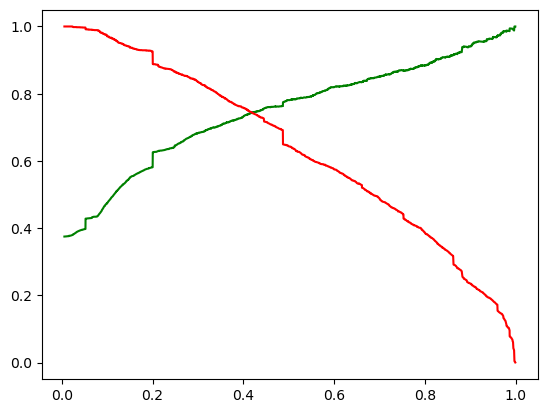

In [196]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Evaluating modelon test set

In [197]:
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

In [198]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
1926             0                    -0.865647   
5654             0                    -0.865647   
1209             0                    -0.482236   
5234             0                    -0.084007   
8497             0                    -0.476679   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1926                                    0                          0   
5654                                    0                          0   
1209                                    1                          0   
5234                                    1                          0   
8497                                    1                          0   

      Last Activity_Had a Phone Conversation  \
1926                                       0   
5654                                       0   
1209                                       0   
5234                                       0   
8497                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
1926                                      0                       0   
5654                                      1                       0   
1209                                      0                       0   
5234                                      0                       0   
8497                                      0                       0   

      Specialization_Others  What is your current occupation_Other  \
1926                      0                                      0   
5654                      0                                      0   
1209                      1                                      0   
5234                      0                                      0   
8497                      0                                      0   

      What is your current occupation_Student  \
1926                                        0   
5654                                        0   
1209                                        0   
5234                                        0   
8497                                        1   

      What is your current occupation_Unemployed  \
1926                                           0   
5654                                           0   
1209                                           0   
5234                                           1   
8497                                           0   

      Last Notable Activity_Olark Chat Conversation  \
1926                                              0   
5654                                              0   
1209                                              0   
5234                                              0   
8497                                              0   

      Last Notable Activity_Unreachable  Lead Source_Olark Chat  \
1926                                  0                       1   
5654                                  0                       1   
1209                                  0                       0   
5234                                  0                       0   
8497                                  0                       0   

      Lead Source_Welingak Website  
1926                             0  
5654                             0  
1209                             0  
5234                             0  
8497                             0

In [199]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534 entries, 1926 to 3387
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Do Not Email                                   2534 non-null   int64  
 1   Total Time Spent on Website                    2534 non-null   float64
 2   Lead Origin_Landing Page Submission            2534 non-null   uint8  
 3   Lead Origin_Lead Add Form                      2534 non-null   uint8  
 4   Last Activity_Had a Phone Conversation         2534 non-null   uint8  
 5   Last Activity_Olark Chat Conversation          2534 non-null   uint8  
 6   Last Activity_SMS Sent                         2534 non-null   uint8  
 7   Specialization_Others                          2534 non-null   uint8  
 8   What is your current occupation_Other          2534 non-null   uint8  
 9   What is your current occupation_Student        25

In [200]:
X_test=X_test.drop(["Last Notable Activity_Olark Chat Conversation"],axis=1)

In [201]:
X_test_sm = sm.add_constant(X_test)

In [202]:
y_test_pred = res.predict(X_test_sm)

In [203]:
y_test_pred[:10]

1926    0.903504
5654    0.672457
1209    0.317901
5234    0.162477
8497    0.145444
1918    0.282989
7405    0.296539
6561    0.066286
5492    0.797273
7851    0.919190
dtype: float64

In [204]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [205]:
y_pred_1.head()

0
1926  0.903504
5654  0.672457
1209  0.317901
5234  0.162477
8497  0.145444

In [206]:
y_test_df = pd.DataFrame(y_test)

In [207]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 2534 entries, 1926 to 3387
Series name: Converted
Non-Null Count  Dtype
--------------  -----
2534 non-null   int64
dtypes: int64(1)
memory usage: 39.6 KB


In [208]:
y_test_df['Prospect ID'] = y_test_df.index

In [209]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [210]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [211]:
y_pred_final.head()

Converted  Prospect ID         0
0          1         1926  0.903504
1          0         5654  0.672457
2          0         1209  0.317901
3          0         5234  0.162477
4          0         8497  0.145444

In [212]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [213]:
y_pred_final.head()

Converted  Prospect ID  Converted_Prob
0          1         1926        0.903504
1          0         5654        0.672457
2          0         1209        0.317901
3          0         5234        0.162477
4          0         8497        0.145444

In [214]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [215]:
y_pred_final.head()

Converted  Prospect ID  Converted_Prob  final_predicted
0          1         1926        0.903504                1
1          0         5654        0.672457                1
2          0         1209        0.317901                0
3          0         5234        0.162477                0
4          0         8497        0.145444                0

#### All the metrics of test set are calculated and the accuracy is 82%

In [216]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8216258879242304

In [217]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1314,  272],
       [ 180,  768]], dtype=int64)

In [218]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [219]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.810126582278481

In [220]:
# Let us calculate specificity
TN / float(TN+FP)

0.8284993694829761